# Imports

In [2]:
import xarray as xr
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import seaborn as sns

# Import my custom functions

In [3]:
paths_to_functions = [
    '/home/www/pschmitt/agile/final_runs_glacier_states/tools_for_analysis/',
]

for path in paths_to_functions:
    sys.path.append(path)

from plot_statistics import plot_stats_per_iteration, plot_stat_metrics
from plot_along_fl import add_bed_h_and_volume_along_fl

2025-11-27 17:07:26: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-11-27 17:07:26: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-11-27 17:07:26: oggm.cfg: Multiprocessing: using all available processors (N=32)
2025-11-27 17:07:27: oggm.workflow: init_glacier_directories by parsing all available folders (this takes time: if possible, provide rgidf instead).


# Define glaciers and glacier states to show

In [4]:
glacier_states = [
    'retreating',
    'equilibrium',
    'advancing',
]

glaciers = [
    'Aletsch',
    'Artesonraju',
    'Baltoro',
    'Peyto',
]

# Plot all settings matrix per glacier

In [5]:
from experiment_file_fg_oggm import experiment_options

glacier_states = ['retreating', 'equilibrium', 'advancing']

main_results_dir = os.environ["OUTPUT_DIR"]

output_folder = os.environ["FIGURES_DIR"]

## Altesch

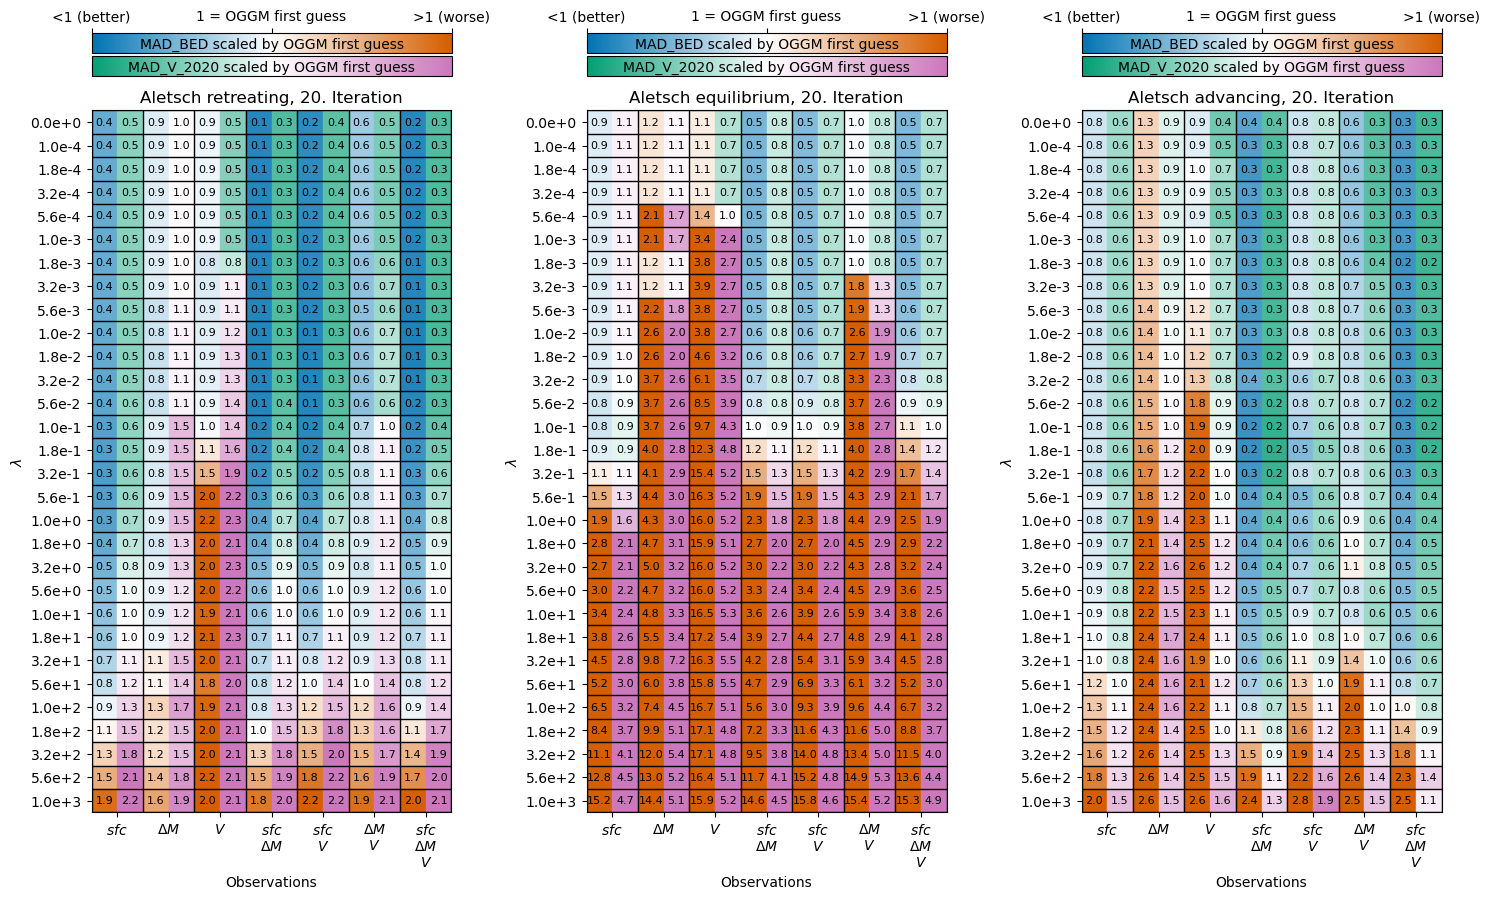

In [11]:
glacier = 'Aletsch'
iteration = 20
fg_method = 'fg_oggm'
output_filename=f'{glacier}_all_states_all_cost_fct_options'

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

for i, glacier_state in enumerate(glacier_states):
    ax = axs[i]
    plot_stat_metrics(ax, main_results_dir,
                      glacier, glacier_state,
                      experiment_options,
                      iteration, fg_method,
                     title=f'{glacier} {glacier_state}, {iteration}. Iteration',
                     )

fig.tight_layout()
if output_filename is None:
    plt.show()
else:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.pdf'),
                dpi=300, bbox_inches='tight')

## Artesonraju

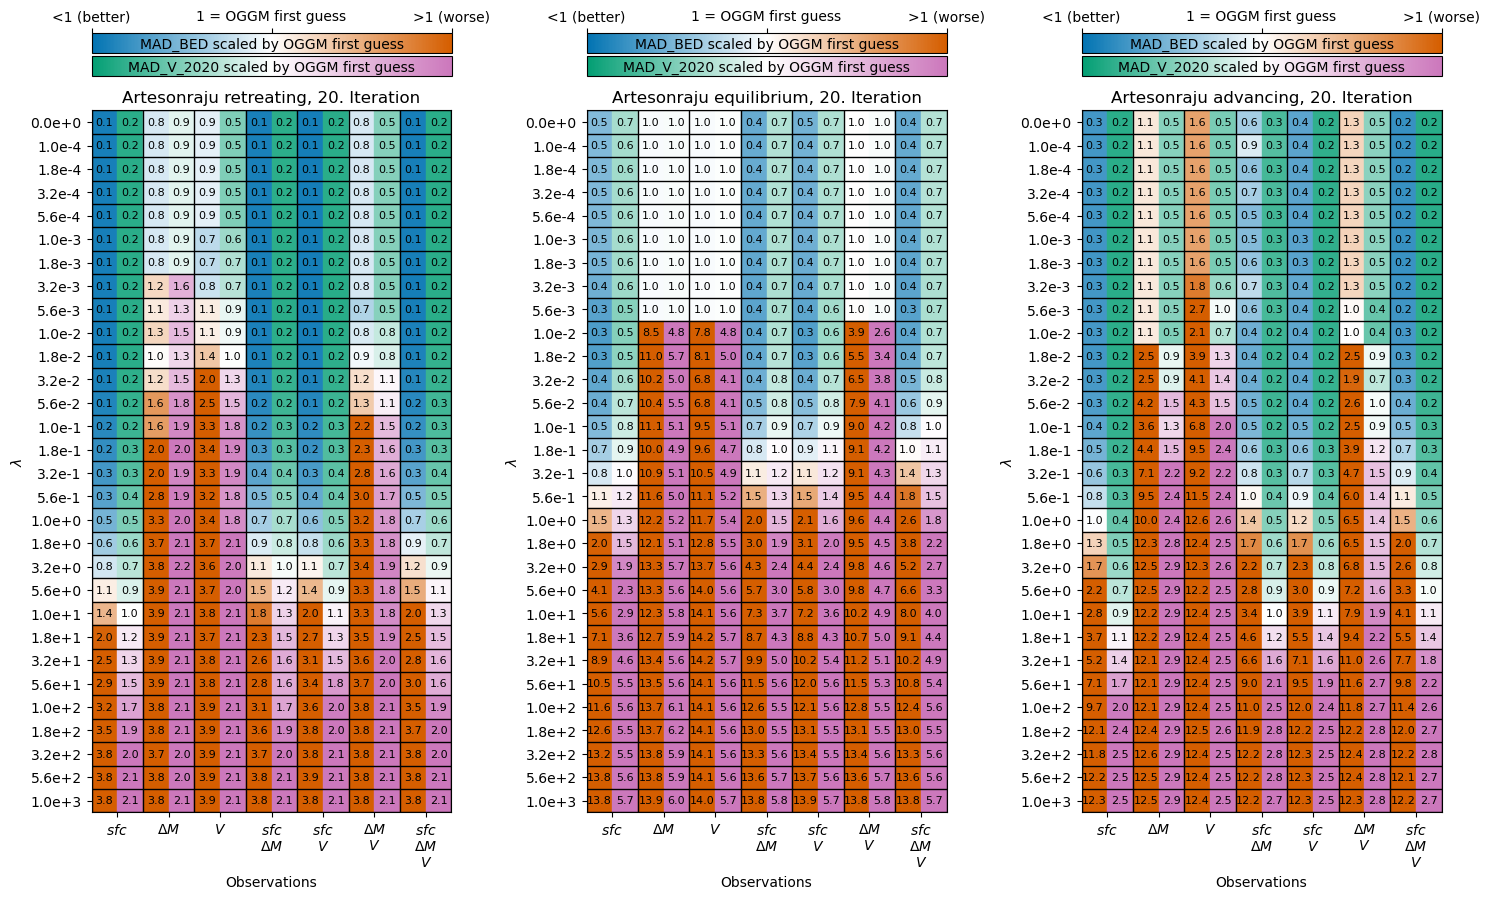

In [12]:
glacier = 'Artesonraju'
iteration = 20
fg_method = 'fg_oggm'
output_filename=f'{glacier}_all_states_all_cost_fct_options'

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

for i, glacier_state in enumerate(glacier_states):
    ax = axs[i]
    plot_stat_metrics(ax, main_results_dir,
                      glacier, glacier_state,
                      experiment_options,
                      iteration, fg_method,
                     title=f'{glacier} {glacier_state}, {iteration}. Iteration',
                     )

fig.tight_layout()
if output_filename is None:
    plt.show()
else:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.pdf'),
                dpi=300, bbox_inches='tight')

## Baltoro    

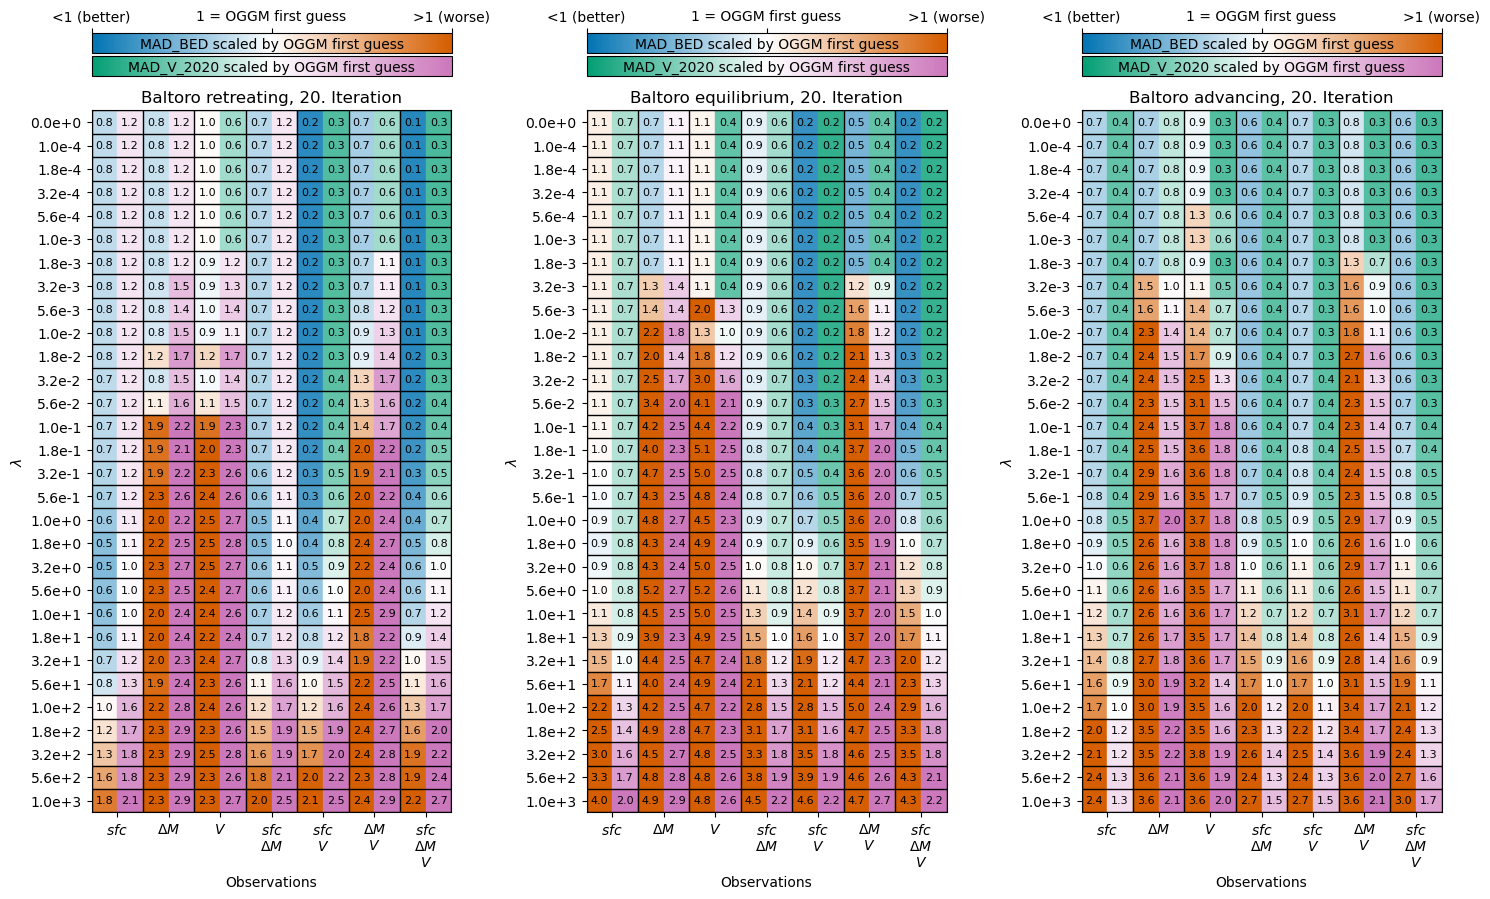

In [13]:
glacier = 'Baltoro'
iteration = 20
fg_method = 'fg_oggm'
output_filename=f'{glacier}_all_states_all_cost_fct_options'

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

for i, glacier_state in enumerate(glacier_states):
    ax = axs[i]
    plot_stat_metrics(ax, main_results_dir,
                      glacier, glacier_state,
                      experiment_options,
                      iteration, fg_method,
                     title=f'{glacier} {glacier_state}, {iteration}. Iteration',
                     )

fig.tight_layout()
if output_filename is None:
    plt.show()
else:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.pdf'),
                dpi=300, bbox_inches='tight')

## Peyto

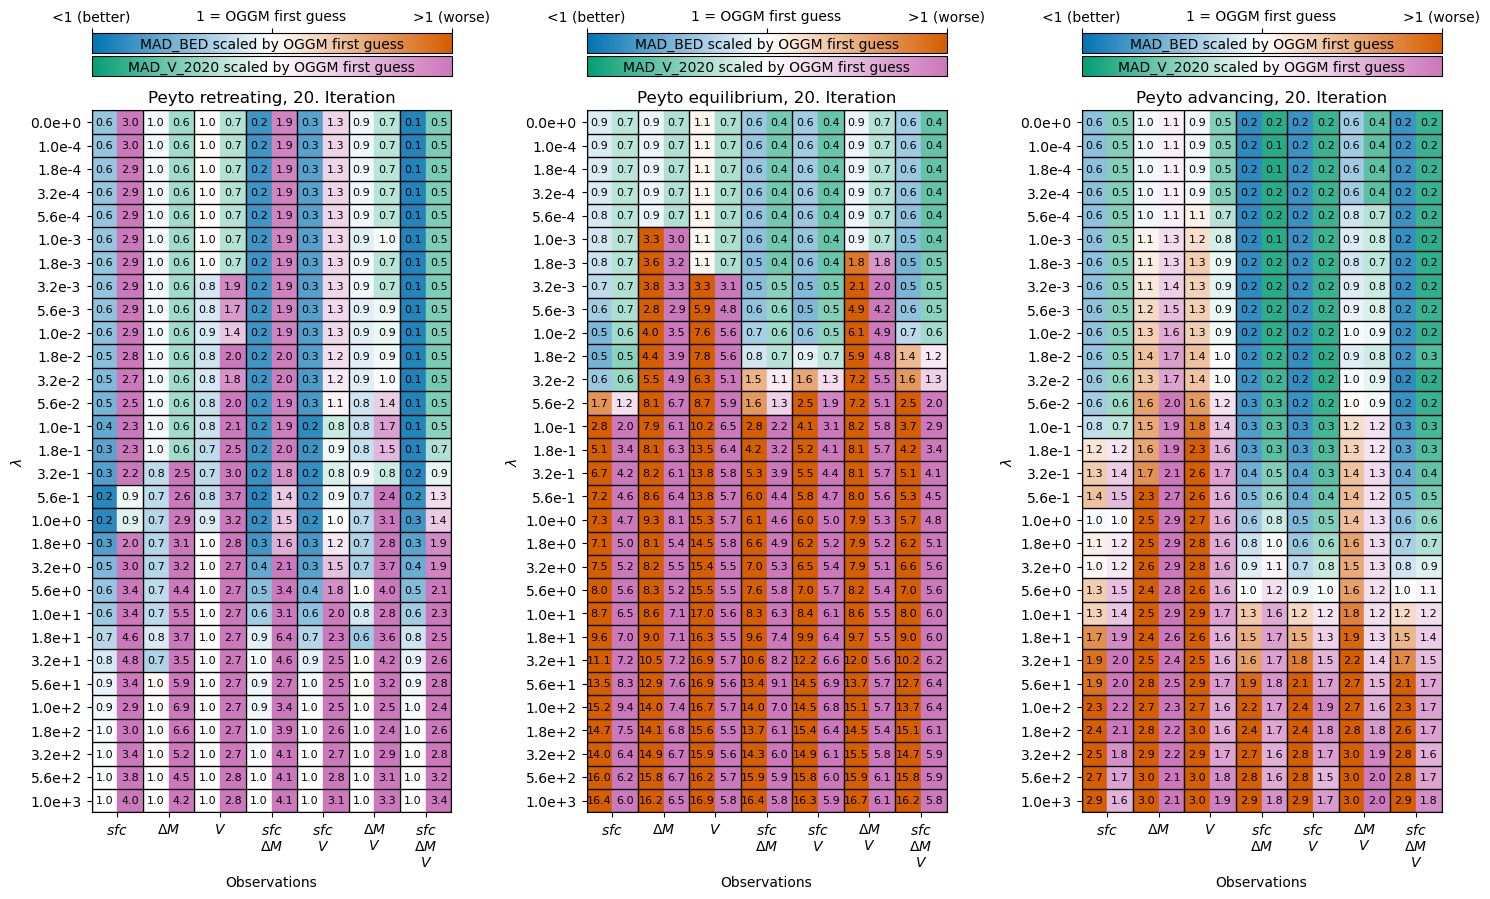

In [14]:
glacier = 'Peyto'
iteration = 20
fg_method = 'fg_oggm'
output_filename=f'{glacier}_all_states_all_cost_fct_options'

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

for i, glacier_state in enumerate(glacier_states):
    ax = axs[i]
    plot_stat_metrics(ax, main_results_dir,
                      glacier, glacier_state,
                      experiment_options,
                      iteration, fg_method,
                     title=f'{glacier} {glacier_state}, {iteration}. Iteration',
                     )

fig.tight_layout()
if output_filename is None:
    plt.show()
else:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.pdf'),
                dpi=300, bbox_inches='tight')

# Plot all settings concise for retreating and advancing only

## All glaciers

In [6]:
from calculate_statistics import create_stat_matrices
from experiment_file_fg_oggm import experiment_options
from plot_labels import get_multiple_short_labels_obs
from matplotlib.legend_handler import HandlerTuple
from matplotlib.gridspec import GridSpec
from agile1d.sandbox.glaciers_for_idealized_experiments import experiment_glaciers

In [7]:
output_folder = 'plots'
lambda_values=None

In [8]:
glacier = 'Aletsch'
iteration = 20
fg_method = 'fg_oggm'
output_filename=f'{glacier}_all_cost_fct_options_concise'
glacier_states = ['retreating', 'advancing']
mad_today_volume_matrix_all = {}
mad_bed_h_matrix_all = {}

for glacier_state in glacier_states:
    (mad_today_volume_matrix, mad_bed_h_matrix,lambda_values, observation_values
    ) = create_stat_matrices(
             main_results_dir, glacier,
             glacier_state, iteration,
             experiment_options,
             fg_method)

    mad_today_volume_matrix_all[glacier_state] = mad_today_volume_matrix
    mad_bed_h_matrix_all[glacier_state] = mad_bed_h_matrix

if False:
    for i, glacier_state in enumerate(glacier_states):
        plot_stat_metrics(ax, main_results_dir,
                          glacier, glacier_state,
                          experiment_options,
                          iteration, fg_method,
                         title=f'{glacier} {glacier_state}, {iteration}. Iteration',
                         )

In [9]:
def plot_concise_stats_per_iteration(
    axs, main_results_dir,
    glacier, glacier_states,
    experiment_options,
    iteration,
    fg_method='fg_oggm',
    title=None, lw_grid=1,
    add_legend=True,
    ax_labels=None,
    testing=False,
    lambda_values=lambda_values,
):

    mad_today_volume_matrix_all = {}
    mad_bed_h_matrix_all = {}
    if not testing:
        # get the data for each glacier state
        for glacier_state in glacier_states:
            (mad_today_volume_matrix, mad_bed_h_matrix,lambda_values, observation_values
            ) = create_stat_matrices(
                     main_results_dir, glacier,
                     glacier_state, iteration,
                     experiment_options,
                     fg_method)
        
            mad_today_volume_matrix_all[glacier_state] = mad_today_volume_matrix
            mad_bed_h_matrix_all[glacier_state] = mad_bed_h_matrix

    # define some stylings
    colorblind_palette = sns.color_palette("colorblind")
    color1 = colorblind_palette[0]
    color2 = colorblind_palette[3]
    linestyles = ['-', ':']
    markers = ['.', 'x']
    ylim = [0, 1.7]

    # define axis labels
    obs_labels = get_multiple_short_labels_obs(experiment_options['observations'])
    lambda_labels = [
        f"{experiment_options['cost_lambda'][lam]:.1e}".replace('e-0', 'e-').replace('e+0', 'e+')
        for lam in lambda_values
    ]
    xticks_position = np.arange(0,29,4) + 1

    

    # plot each observation on a separate axis
    for obs, ax in enumerate(axs):
        for glacier_state, ls, ms in zip(glacier_states, linestyles, markers):

            # help function for plotting line and zero value
            def plot_line_and_zero(mad_data_matrix, data, color):
                # zero value, only if inside ylim
                if mad_data_matrix[0,obs] <= ylim[1]:
                    ax.plot(0, mad_data_matrix[0,obs],
                            c=color, clip_on=False, zorder=3, marker=ms, ls='',
                            label=f'zero_{data}_{glacier_state}'
                           )

                # line
                ax.plot(np.arange(1, 30), mad_data_matrix[1:,obs],
                        c=color, zorder=3, lw=1.5, ls=ls,
                        label=f'line_{data}_{glacier_state}'
                       )

            # plot today volume and bed
            plot_line_and_zero(mad_today_volume_matrix_all[glacier_state],
                               'volume', color1)
            plot_line_and_zero(mad_bed_h_matrix_all[glacier_state],
                               'bed', color2)

        # add gray area for indicating fg improved
        ax.axhspan(0, 1, color='gray', alpha=0.3, zorder=0,
                   label='below 1 area')
        ax.axhline(1, color='black', lw=0.5, zorder=2)

        # title
        if obs == 0:
            ax.set_title(title)

        # x-axis formatting and labels
        ax.tick_params(axis='x', length=0)
        ax.set_xlim([1, 29])
        if obs != len(axs)-1:
            ax.set_xticks(xticks_position, [])
            ax.set_xticklabels([])
            
        else:
            rotation = 25
            ax.set_xticks(xticks_position, np.array(lambda_labels)[xticks_position],
                          rotation=rotation, clip_on=False)
            ax.text(0, -0.1, '0',
                    va='top', ha='center',
                    rotation=rotation)
    
            ax.set_xlabel("$\lambda$")

        # y-axis formatting and labels
        ax.set_ylim(ylim)
        ax.text(-1.3, np.mean(ylim),
                obs_labels[obs].replace('\n', ', '),
                va='center', ha='right')
        if obs == 0:
            ax.set_yticks([0, 1], ['0', '1 = fg'])
            ax.yaxis.tick_right()
        else:
            ax.set_yticks([])

        # general axis styling
        ax.grid('on')

        # legend
        if add_legend:
            if obs == 6:
                # create dummy lines for different color
                for glacier_state, ls, ms in zip(glacier_states, linestyles, markers):
                    dummy_color = 'gray'
                    ax.plot([], marker=ms, ls='', c=dummy_color,
                            label=f'dummy_zero_{glacier_state}')
                    ax.plot([], ls=ls, c=dummy_color,
                            label=f'dummy_line_{glacier_state}')

                handles, labels = ax.get_legend_handles_labels()
                ax.legend(
                    [handles[1], handles[3], handles[8],
                     (handles[9], handles[10]), (handles[11], handles[12]),],
                    ['MAD_V_2020', 'MAD_BED', 'first guess (fg) improved',
                     'retreating', 'advancing',],
                    handler_map={tuple: HandlerTuple(ndivide=None)},
                    loc='upper center', #'lower center',
                    bbox_to_anchor=(0.5, -2), #(0.5, 1.7),
                    ncol=2,
                )

        # axis labesl
        if ax_labels:
            ax.text(0.01, 0.95,  # first submission was 0.96
                    ax_labels[obs],
                    transform=ax.transAxes,
                    ha='left',
                    va='top',
                    fontsize=9,
                   )

In [10]:
glaciers = sorted(experiment_glaciers)

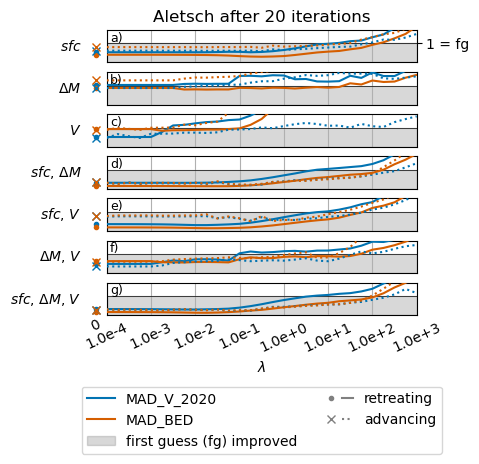

In [12]:
savefig = True
for glacier in glaciers[0:1]:
    iteration = 20
    fg_method = 'fg_oggm'
    output_filename=f'{glacier}_all_cost_fct_options_concise'
    glacier_states = ['retreating', 'advancing']
    ax_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']
    
    fig, axs = plt.subplots(7, 1, figsize=(4, 3.7), gridspec_kw={'hspace': 0.3})
    
    plot_concise_stats_per_iteration(
        axs, main_results_dir,
        glacier, glacier_states,
        experiment_options,
        iteration,
        title=f'{glacier} after 20 iterations',
        ax_labels=ax_labels,
    )

    if savefig:
        plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                    dpi=300, bbox_inches='tight')

## two glaciers

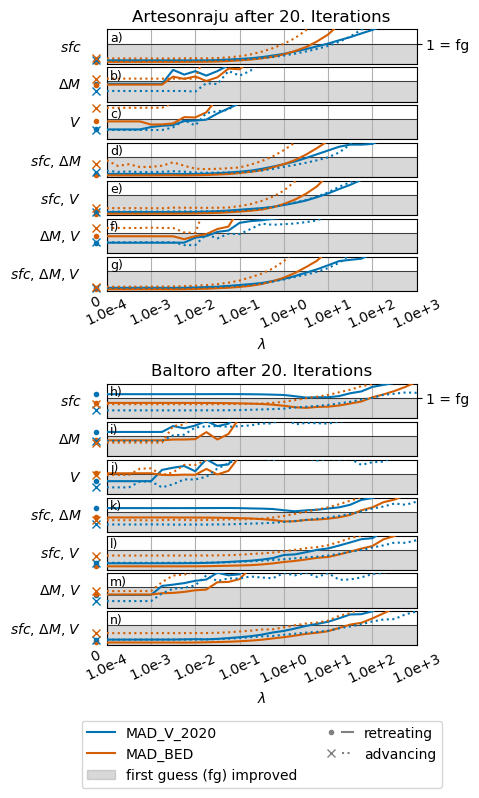

In [346]:
testing = False
savefig = True

glacier_1 = glaciers[1]
glacier_2 = glaciers[2]

ax_labels_1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']
ax_labels_2 = ['h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)']

output_filename=f'{glacier_1}_and{glacier_2}_all_cost_fct_options_concise'
glacier_states = ['retreating', 'advancing']

fig = plt.figure(figsize=(4, 8))

space_between_h = 2.5
gs = GridSpec(15, 1,
              height_ratios=[1, 1, 1, 1, 1, 1, 1, space_between_h,
                             1, 1, 1, 1, 1, 1, 1,
                            ],
              hspace=0.1,
             )

axs1 = []
axs2 = []
for i in range(7):
    axs1.append(fig.add_subplot(gs[i]))
    axs2.append(fig.add_subplot(gs[i+8]))

plot_concise_stats_per_iteration(
    axs1, main_results_dir,
    glacier_1, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_1} after 20. Iterations',
    ax_labels=ax_labels_1,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs2, main_results_dir,
    glacier_2, glacier_states,
    experiment_options,
    iteration,
    add_legend=True,
    title=f'{glacier_2} after 20. Iterations',
    ax_labels=ax_labels_2,
    testing=testing,
)

if savefig:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

## three glaciers

In [12]:
glaciers

['Aletsch', 'Artesonraju', 'Baltoro', 'Peyto']

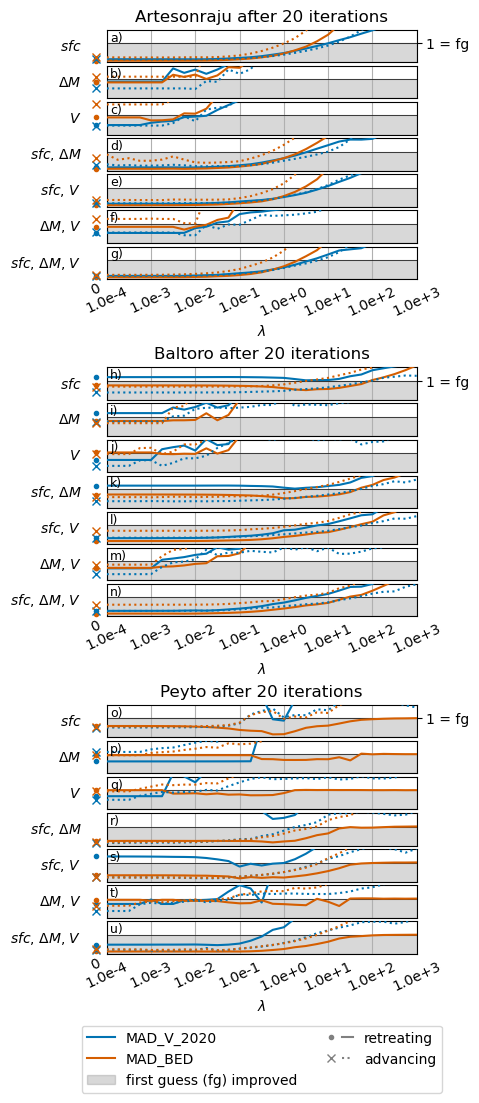

In [13]:
testing = False
savefig = True

glacier_1 = glaciers[1]
glacier_2 = glaciers[2]
glacier_3 = glaciers[3]

ax_labels_1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']
ax_labels_2 = ['h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)']
ax_labels_3 = ['o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)']

output_filename=f'{glacier_1}_and_{glacier_2}_{glacier_3}_all_cost_fct_options_concise'
glacier_states = ['retreating', 'advancing']

fig = plt.figure(figsize=(4, 12))

space_between_h = 2.5
gs = GridSpec(23, 1,
              height_ratios=[1, 1, 1, 1, 1, 1, 1, space_between_h,
                             1, 1, 1, 1, 1, 1, 1, space_between_h,
                             1, 1, 1, 1, 1, 1, 1,
                            ],
              hspace=0.1,
             )

axs1 = []
axs2 = []
axs3 = []
for i in range(7):
    axs1.append(fig.add_subplot(gs[i]))
    axs2.append(fig.add_subplot(gs[i+8]))
    axs3.append(fig.add_subplot(gs[i+16]))

plot_concise_stats_per_iteration(
    axs1, main_results_dir,
    glacier_1, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_1} after 20 iterations',
    ax_labels=ax_labels_1,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs2, main_results_dir,
    glacier_2, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_2} after 20 iterations',
    ax_labels=ax_labels_2,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs3, main_results_dir,
    glacier_3, glacier_states,
    experiment_options,
    iteration,
    add_legend=True,
    title=f'{glacier_3} after 20 iterations',
    ax_labels=ax_labels_3,
    testing=testing,
)

if savefig:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

## four glaciers

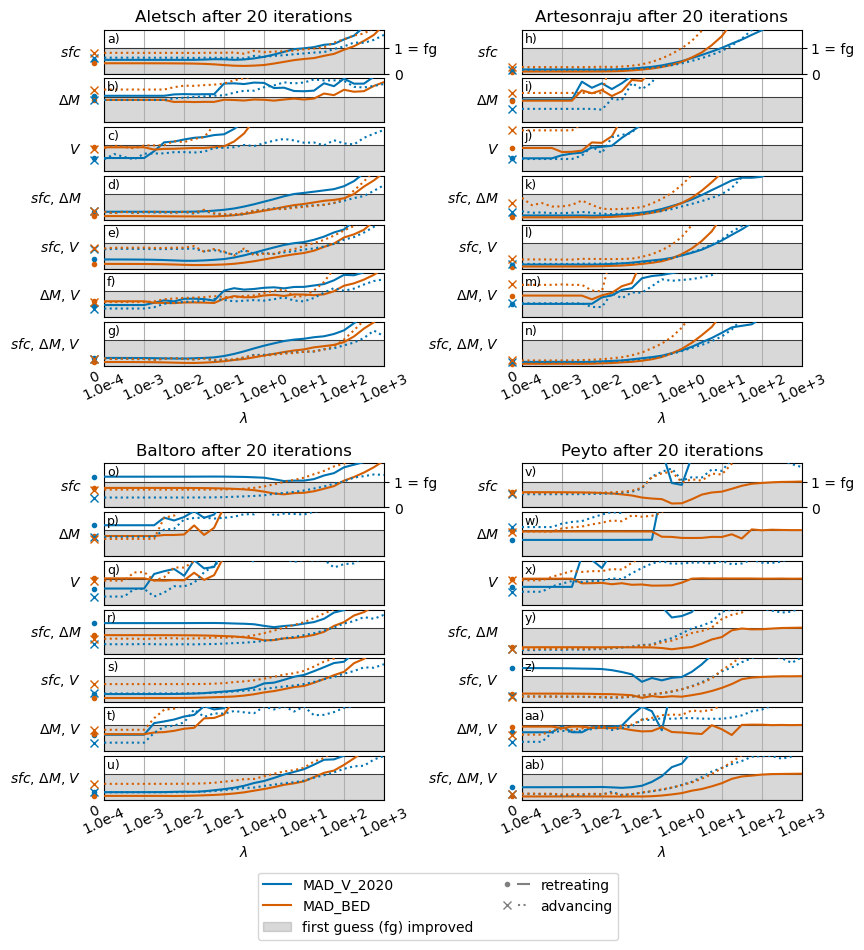

In [12]:
testing = False
savefig = True

glacier_0 = glaciers[0]
glacier_1 = glaciers[1]
glacier_2 = glaciers[2]
glacier_3 = glaciers[3]

ax_labels_0 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']
ax_labels_1 = ['h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)']
ax_labels_2 = ['o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)']
ax_labels_3 = ['v)', 'w)', 'x)', 'y)', 'z)', 'aa)', 'ab)']

output_filename=f'all_glaciers_all_cost_fct_options_concise'
glacier_states = ['retreating', 'advancing']

fig = plt.figure(figsize=(9, 10))

space_between_h = 2
space_between_w = 0.2
gs = GridSpec(15, 3,
              height_ratios=[1, 1, 1, 1, 1, 1, 1, space_between_h,
                             1, 1, 1, 1, 1, 1, 1,
                            ],
              width_ratios=[1, space_between_w, 1],
              hspace=0.1,
             )

axs0 = []
axs1 = []
axs2 = []
axs3 = []

for i in range(7):
    axs0.append(fig.add_subplot(gs[i, 0]))
    axs1.append(fig.add_subplot(gs[i, 2]))
    axs2.append(fig.add_subplot(gs[i+8, 0]))
    axs3.append(fig.add_subplot(gs[i+8, 2]))

plot_concise_stats_per_iteration(
    axs0, main_results_dir,
    glacier_0, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_0} after 20 iterations',
    ax_labels=ax_labels_0,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs1, main_results_dir,
    glacier_1, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_1} after 20 iterations',
    ax_labels=ax_labels_1,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs2, main_results_dir,
    glacier_2, glacier_states,
    experiment_options,
    iteration,
    add_legend=False,
    title=f'{glacier_2} after 20 iterations',
    ax_labels=ax_labels_2,
    testing=testing,
)

plot_concise_stats_per_iteration(
    axs3, main_results_dir,
    glacier_3, glacier_states,
    experiment_options,
    iteration,
    add_legend=True,
    title=f'{glacier_3} after 20 iterations',
    ax_labels=ax_labels_3,
    testing=testing,
)

legend = axs3[-1].get_legend()
legend.set_bbox_to_anchor((-0.3, -1.5))

if savefig:
    plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')